In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Health A3/final_data.csv')
df.head(5)

,SodiumBicarbonate_7day_after,WhiteBloodCells_7day_before,WhiteBloodCells_7day_after,ALT_7day_before,ALT_7day_after,Aspartate_Aminotransferase_7day_before,Aspartate_Aminotransferase_7day_after,Red_Cell_Distribution_Width_ALT_7day_before,Red_Cell_Distribution_Width_7day_after,avg_mch_before,avg_mch_after,avg_ph_before,avg_ph_after,avg_sodium_before,avg_sodium_after,avg_glucose_before,avg_glucose_after,prev_event_count,before7_num_antibiotics_input,after7_num_antibiotics_input,before7_num_vasoactive_input,after7_num_vasoactive_input,before7_anticoagulant_input,after7_num_anticoagulant_input,before7_max_temperature_c,after7_max_temperature_c,before7_avg_potassium,after7_avg_potassium,before7_avg_creatinine,after7_avg_creatinine,before7_Prothrombin_time,after_7_Prothrombin_time,INR_7day_before,INR_7day_after,Platelets_7day_before,Platelets_7day_after,AnionGap_7day_before,AnionGap_7day_after,avg_pao2_fio2_before_x,avg_pao2_fio2_after_x,mortality_status,SodiumBicarbonate_7day_before,MAP_7day_before,MAP_7day_after,Bilirubin_7day_before,Bilirubin_7day_after,UrineOutput_7day_before,UrineOutput_7day_after,gender,age,HeartRate_7day_before,HeartRate_7day_after,RespiratoryRate_7day_before,RespiratoryRate_7day_after,GCS_Eye_7day_before,GCS_Eye_7day_after,GCS_Verbal_7day_before,GCS_Verbal_7day_after,GCS_Motor_7day_before,GCS_Motor_7day_after,avg_pao2_before,avg_pao2_after,avg_pao2_fio2_before_y,avg_pao2_fio2_after_y,GCS_SCORE_BEFORE,GCS_SCORE_AFTER,APSIII_BEFORE,APSIII_AFTER,SOFA_BEFORE,SOFA_AFTER
0,26.333333,12.150000,9.980000,33.142857,28.500000,82.714286,58.000000,14.525000,14.580000,29.612500,29.380000,7.448462,7.533333,131.615385,130.166667,227.871347,223.000000,1,12,5,12,0,0,0,39.333333,37.277778,4.461538,3.966667,3.061538,2.800000,12.733333,12.550000,1.166667,1.20000,208.000000,142.600000,20.307692,19.500000,205.996624,205.996624,1,18.769231,103.850241,87.375000,0.285714,0.550000,840,840,M,66,103.850241,87.375000,19.436548,20.732143,2.305556,3.928571,1.0,1.000000,3.472222,4.545455,109.514286,109.514286,205.996624,205.996624,6.777778,9.474026,58,47,8,9
1,20.500000,3.075000,0.100000,42.555556,44.000000,121.722222,77.500000,16.970000,18.833333,33.205000,31.366667,7.352593,7.420000,131.576923,133.625000,135.480738,116.383081,0,35,9,26,0,0,0,39.277778,38.222222,4.734615,4.650000,3.148000,2.233333,15.516667,14.550000,1.425000,1.35000,23.739130,25.333333,20.846154,20.125000,265.451299,265.451299,1,21.076923,105.246324,109.366667,0.961111,2.500000,840,840,M,63,105.246324,109.366667,18.070111,14.600000,2.674419,2.909091,1.0,1.000000,4.488372,5.000000,101.896552,101.896552,265.451299,265.451299,8.162791,8.909091,43,52,11,13
2,10.000000,12.433333,13.351770,19.794143,19.520833,36.488742,184.096012,14.433333,16.221626,31.566667,29.977662,7.305000,7.090000,125.818182,136.000000,91.000000,175.785538,0,2,0,9,3,0,0,36.888889,36.968333,4.600000,4.700000,1.100000,1.000000,18.000000,16.802227,1.600000,1.52997,244.000000,201.894403,29.000000,29.000000,220.547414,220.547414,1,18.545455,86.875000,74.333333,2.186376,3.049328,840,840,F,64,86.875000,74.333333,26.125000,16.666667,4.000000,3.127858,5.0,2.957066,6.000000,4.800685,121.555556,121.555556,220.547414,220.547414,15.000000,10.885610,40,58,5,7
3,28.944444,16.564286,15.616667,309.750000,123.000000,407.500000,121.000000,14.221429,15.066667,30.028571,29.291667,7.382727,7.440000,142.950000,145.950000,198.375000,127.646485,0,4,19,42,1,0,0,37.111111,38.777778,3.876190,3.530000,0.806250,1.183333,13.275000,13.616667,1.133333,1.17500,134.647059,187.250000,11.625000,12.833333,222.230727,222.230727,0,23.187500,79.160305,78.269006,2.186376,1.080000,840,840,M,64,79.160305,78.269006,18.213740,16.805882,1.709677,2.513514,1.0,1.702703,3.400000,4.027027,113.521739,113.521739,222.230727,222.230727,6.109677,8.243243,46,35,9,6
4,30.625000,5.742857,5.271429,67.200000,25.000000,20.400000,18.500000,17.171429,16.500000,30.785714,30.914286,7.422468,7.435819,133.066667,132.875000,161.427392,157.664278,1,0,0,14,4,0,0,37.111111,36.

In [ ]:
df['gender']=df['gender'].map({'M':1,'F':0})
df.head(5)

,SodiumBicarbonate_7day_after,WhiteBloodCells_7day_before,WhiteBloodCells_7day_after,ALT_7day_before,ALT_7day_after,Aspartate_Aminotransferase_7day_before,Aspartate_Aminotransferase_7day_after,Red_Cell_Distribution_Width_ALT_7day_before,Red_Cell_Distribution_Width_7day_after,avg_mch_before,avg_mch_after,avg_ph_before,avg_ph_after,avg_sodium_before,avg_sodium_after,avg_glucose_before,avg_glucose_after,prev_event_count,before7_num_antibiotics_input,after7_num_antibiotics_input,before7_num_vasoactive_input,after7_num_vasoactive_input,before7_anticoagulant_input,after7_num_anticoagulant_input,before7_max_temperature_c,after7_max_temperature_c,before7_avg_potassium,after7_avg_potassium,before7_avg_creatinine,after7_avg_creatinine,before7_Prothrombin_time,after_7_Prothrombin_time,INR_7day_before,INR_7day_after,Platelets_7day_before,Platelets_7day_after,AnionGap_7day_before,AnionGap_7day_after,avg_pao2_fio2_before_x,avg_pao2_fio2_after_x,mortality_status,SodiumBicarbonate_7day_before,MAP_7day_before,MAP_7day_after,Bilirubin_7day_before,Bilirubin_7day_after,UrineOutput_7day_before,UrineOutput_7day_after,gender,age,HeartRate_7day_before,HeartRate_7day_after,RespiratoryRate_7day_before,RespiratoryRate_7day_after,GCS_Eye_7day_before,GCS_Eye_7day_after,GCS_Verbal_7day_before,GCS_Verbal_7day_after,GCS_Motor_7day_before,GCS_Motor_7day_after,avg_pao2_before,avg_pao2_after,avg_pao2_fio2_before_y,avg_pao2_fio2_after_y,GCS_SCORE_BEFORE,GCS_SCORE_AFTER,APSIII_BEFORE,APSIII_AFTER,SOFA_BEFORE,SOFA_AFTER
0,26.333333,12.150000,9.980000,33.142857,28.500000,82.714286,58.000000,14.525000,14.580000,29.612500,29.380000,7.448462,7.533333,131.615385,130.166667,227.871347,223.000000,1,12,5,12,0,0,0,39.333333,37.277778,4.461538,3.966667,3.061538,2.800000,12.733333,12.550000,1.166667,1.20000,208.000000,142.600000,20.307692,19.500000,205.996624,205.996624,1,18.769231,103.850241,87.375000,0.285714,0.550000,840,840,1,66,103.850241,87.375000,19.436548,20.732143,2.305556,3.928571,1.0,1.000000,3.472222,4.545455,109.514286,109.514286,205.996624,205.996624,6.777778,9.474026,58,47,8,9
1,20.500000,3.075000,0.100000,42.555556,44.000000,121.722222,77.500000,16.970000,18.833333,33.205000,31.366667,7.352593,7.420000,131.576923,133.625000,135.480738,116.383081,0,35,9,26,0,0,0,39.277778,38.222222,4.734615,4.650000,3.148000,2.233333,15.516667,14.550000,1.425000,1.35000,23.739130,25.333333,20.846154,20.125000,265.451299,265.451299,1,21.076923,105.246324,109.366667,0.961111,2.500000,840,840,1,63,105.246324,109.366667,18.070111,14.600000,2.674419,2.909091,1.0,1.000000,4.488372,5.000000,101.896552,101.896552,265.451299,265.451299,8.162791,8.909091,43,52,11,13
2,10.000000,12.433333,13.351770,19.794143,19.520833,36.488742,184.096012,14.433333,16.221626,31.566667,29.977662,7.305000,7.090000,125.818182,136.000000,91.000000,175.785538,0,2,0,9,3,0,0,36.888889,36.968333,4.600000,4.700000,1.100000,1.000000,18.000000,16.802227,1.600000,1.52997,244.000000,201.894403,29.000000,29.000000,220.547414,220.547414,1,18.545455,86.875000,74.333333,2.186376,3.049328,840,840,0,64,86.875000,74.333333,26.125000,16.666667,4.000000,3.127858,5.0,2.957066,6.000000,4.800685,121.555556,121.555556,220.547414,220.547414,15.000000,10.885610,40,58,5,7
3,28.944444,16.564286,15.616667,309.750000,123.000000,407.500000,121.000000,14.221429,15.066667,30.028571,29.291667,7.382727,7.440000,142.950000,145.950000,198.375000,127.646485,0,4,19,42,1,0,0,37.111111,38.777778,3.876190,3.530000,0.806250,1.183333,13.275000,13.616667,1.133333,1.17500,134.647059,187.250000,11.625000,12.833333,222.230727,222.230727,0,23.187500,79.160305,78.269006,2.186376,1.080000,840,840,1,64,79.160305,78.269006,18.213740,16.805882,1.709677,2.513514,1.0,1.702703,3.400000,4.027027,113.521739,113.521739,222.230727,222.230727,6.109677,8.243243,46,35,9,6
4,30.625000,5.742857,5.271429,67.200000,25.000000,20.400000,18.500000,17.171429,16.500000,30.785714,30.914286,7.422468,7.435819,133.066667,132.875000,161.427392,157.664278,1,0,0,14,4,0,0,37.111111,36.

In [ ]:
# Alternatively, filter out columns with near-zero variance (this can be customized with a threshold)
threshold = 1e-2  # You can adjust the threshold
non_constant_columns = df.loc[:, df.var() > threshold]

In [ ]:
print(non_constant_columns.shape)

(719, 66)


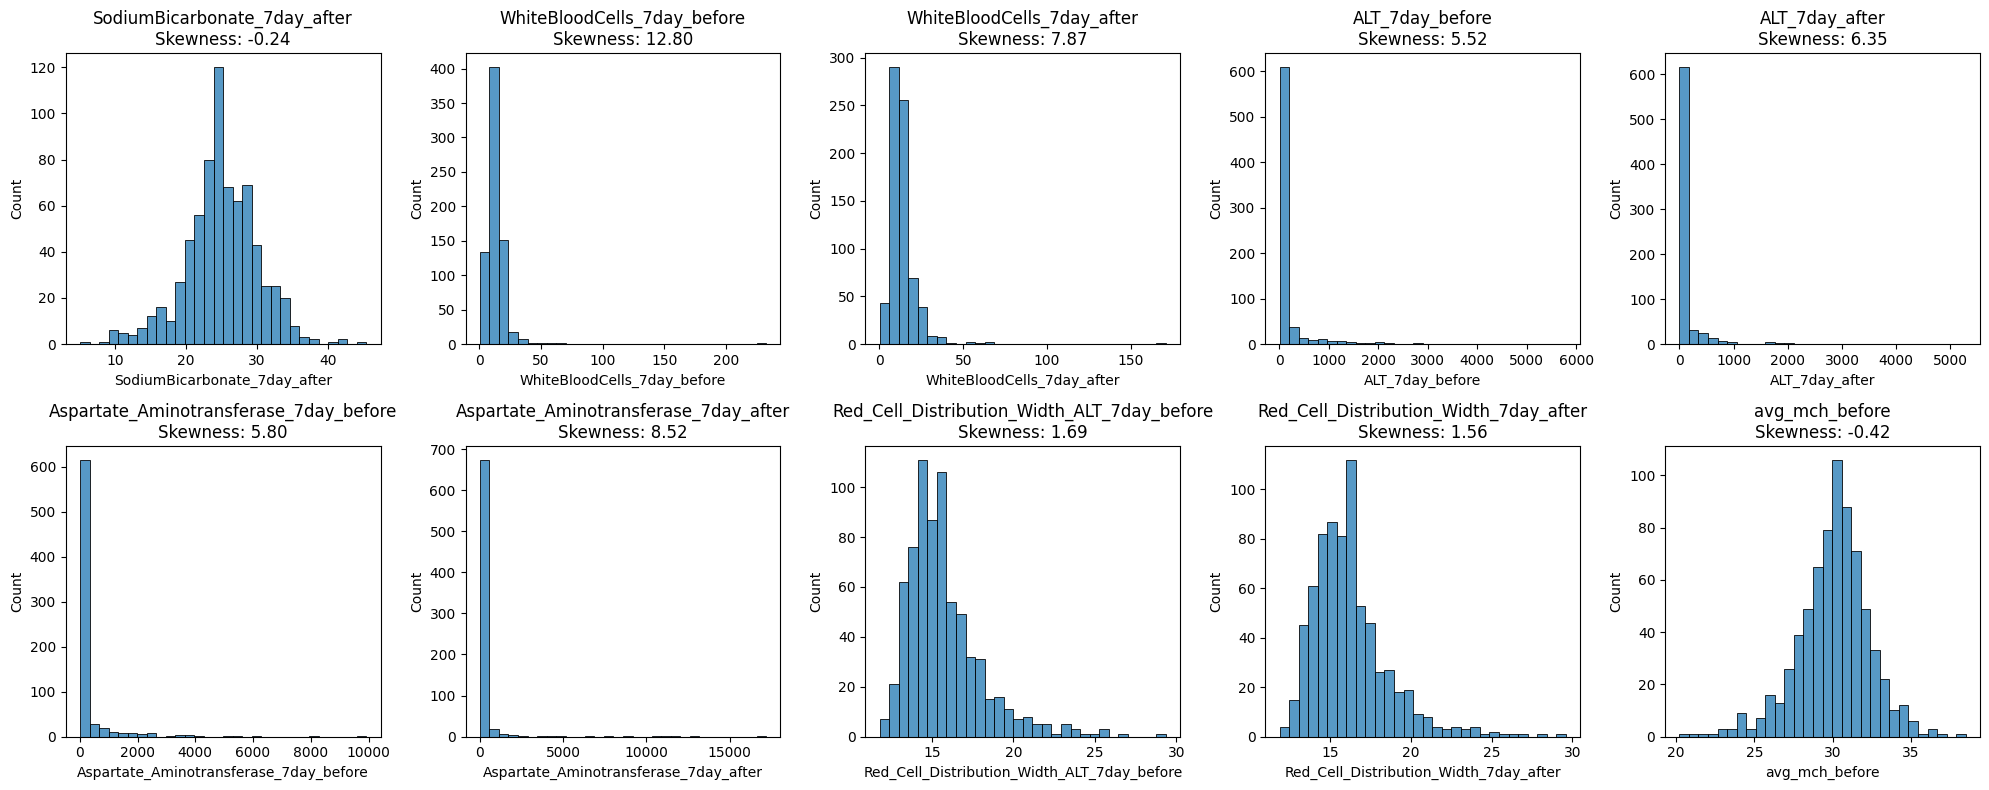

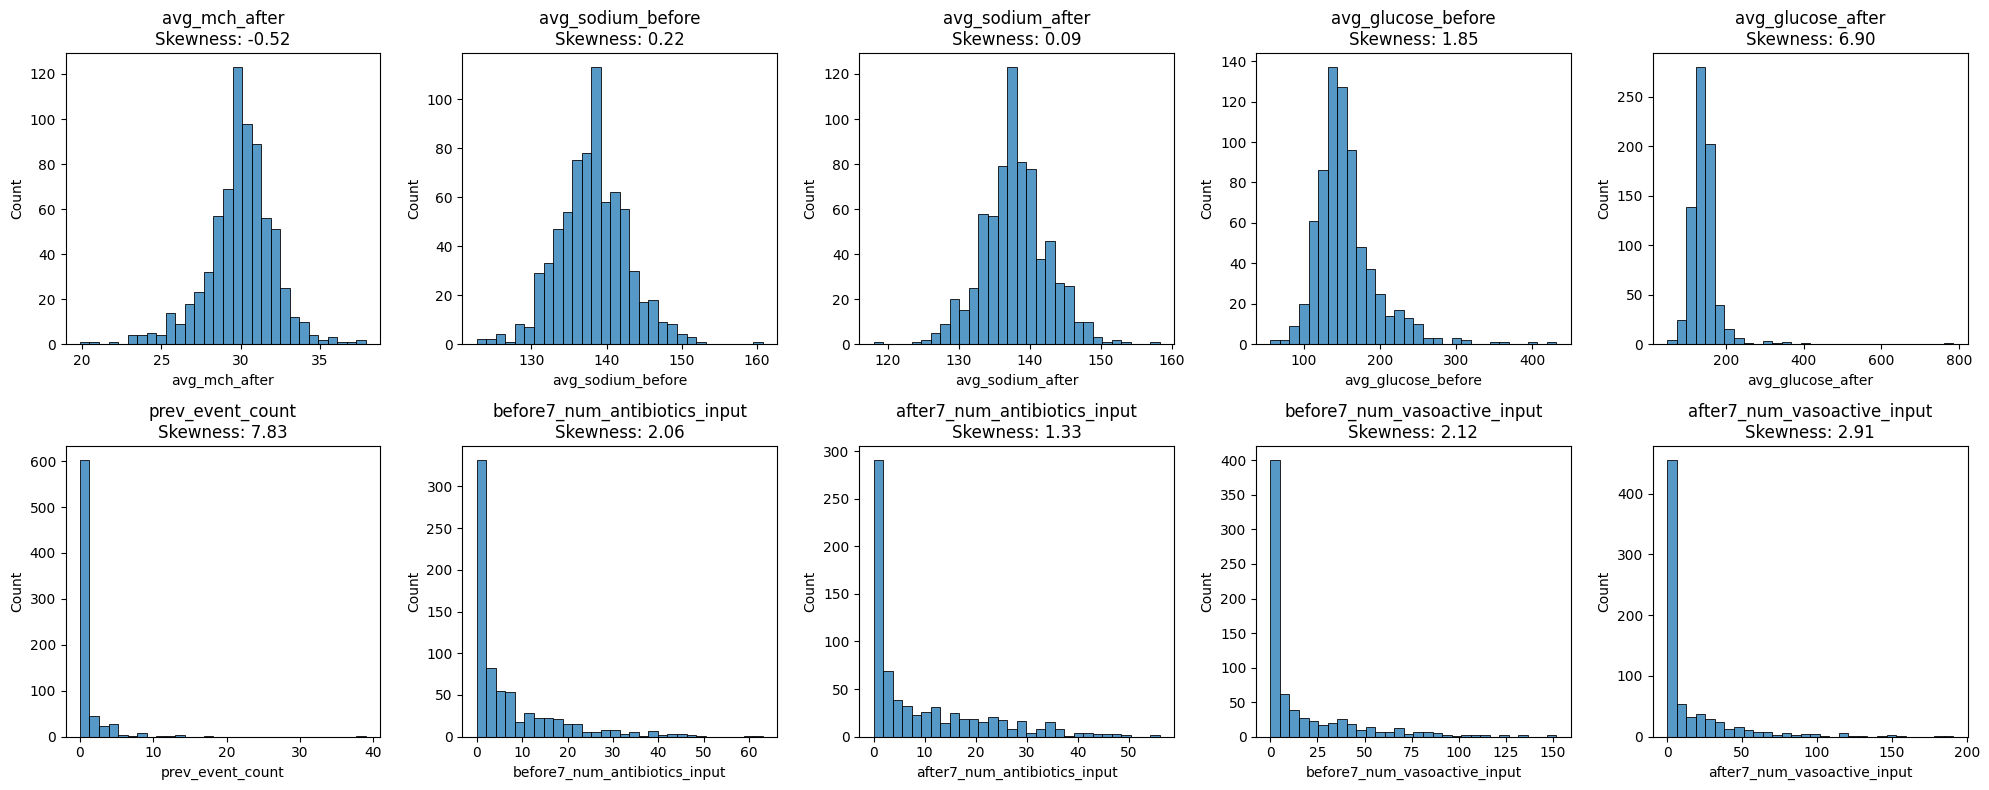

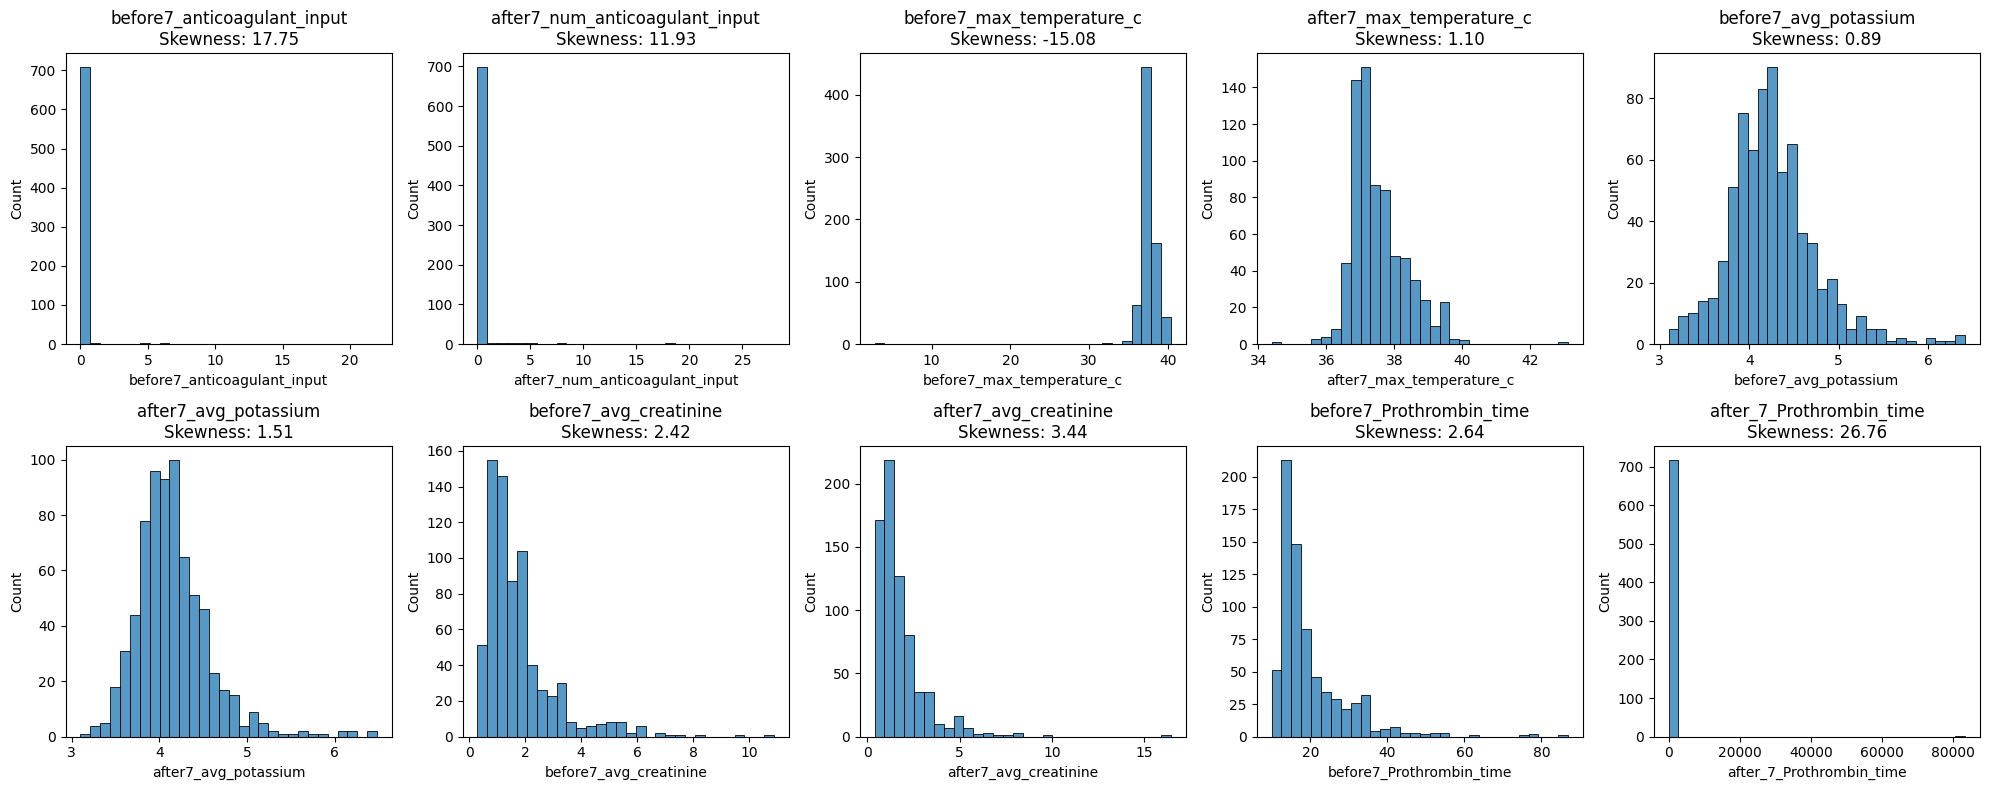

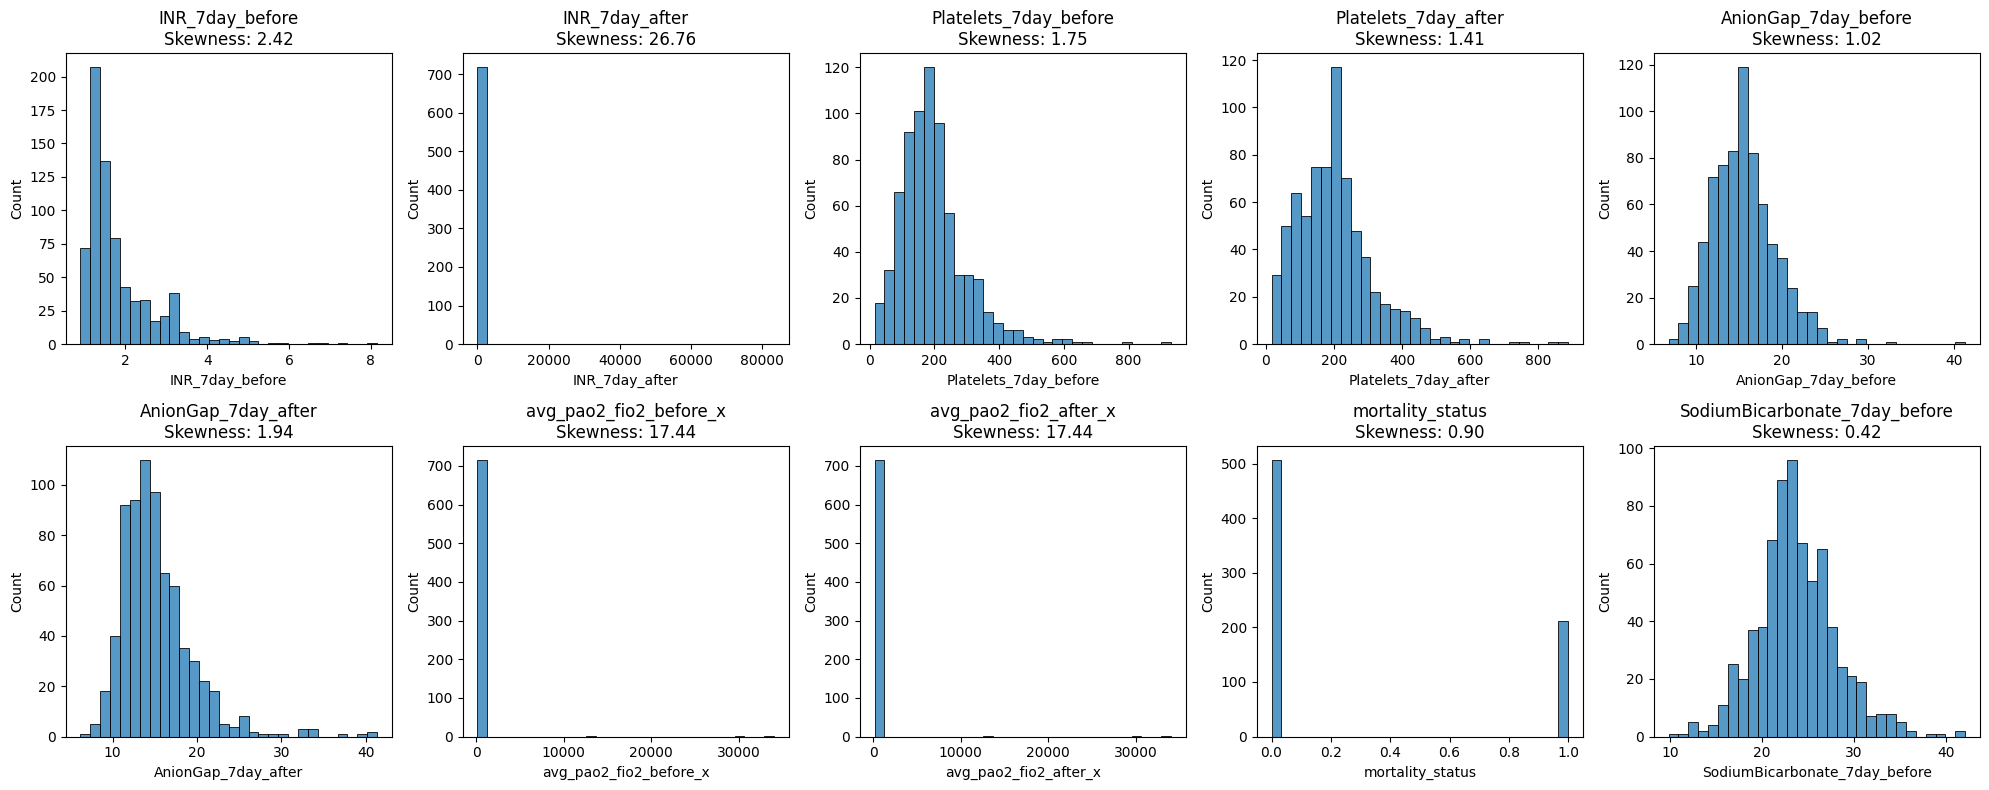

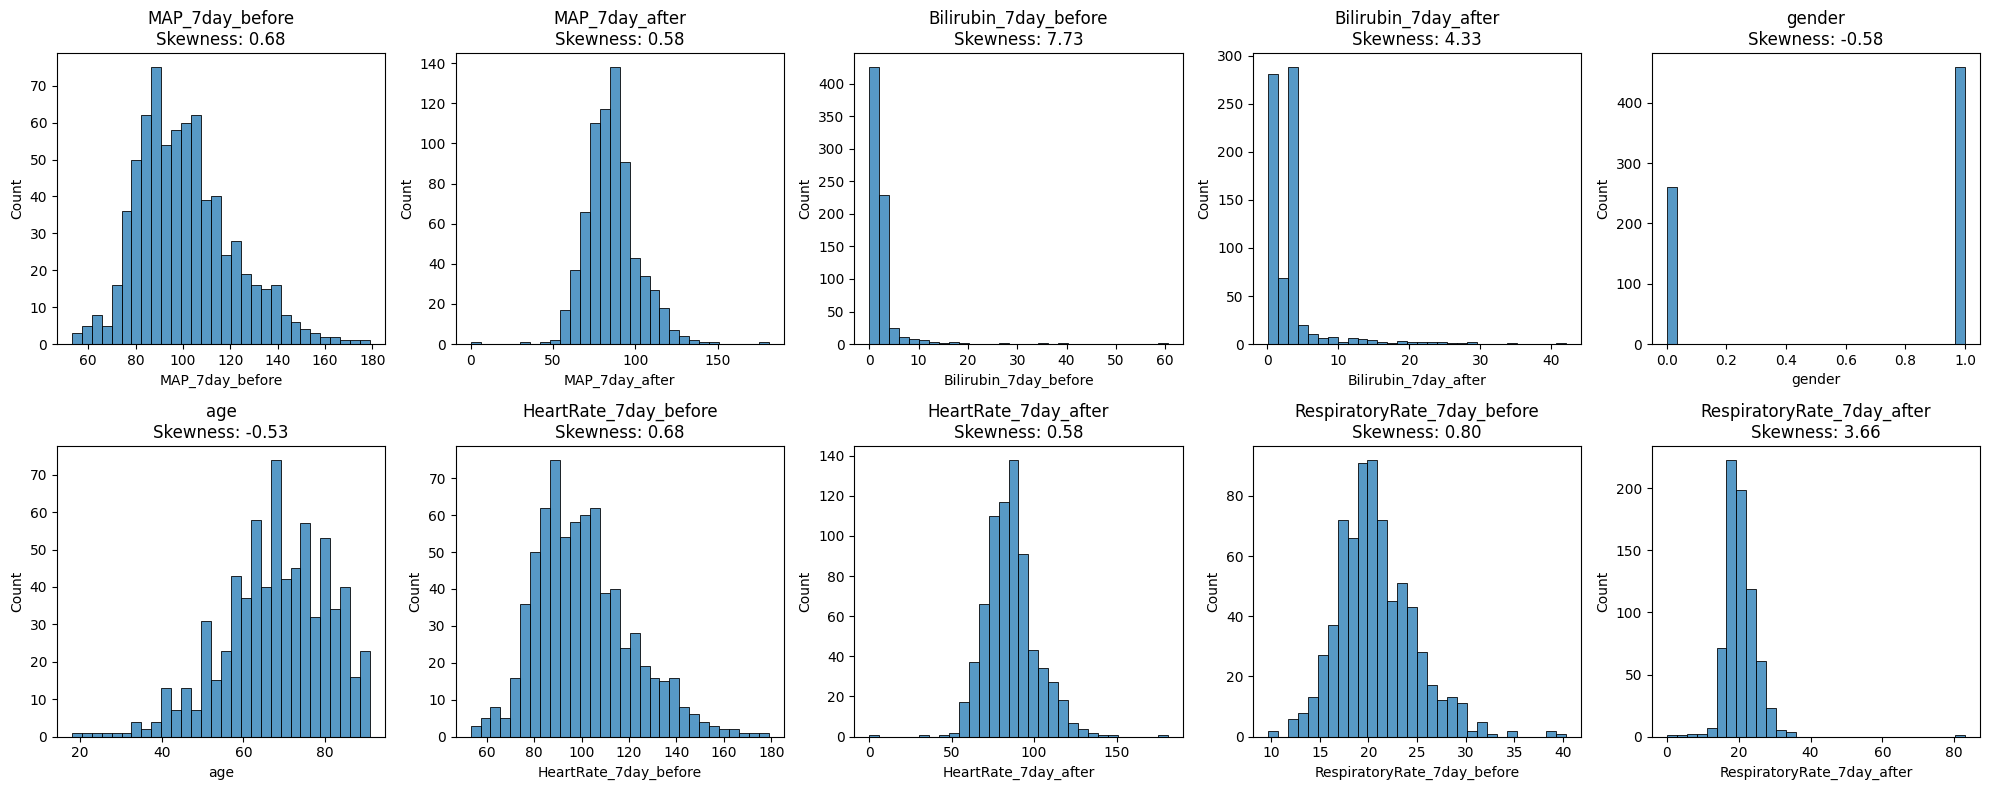

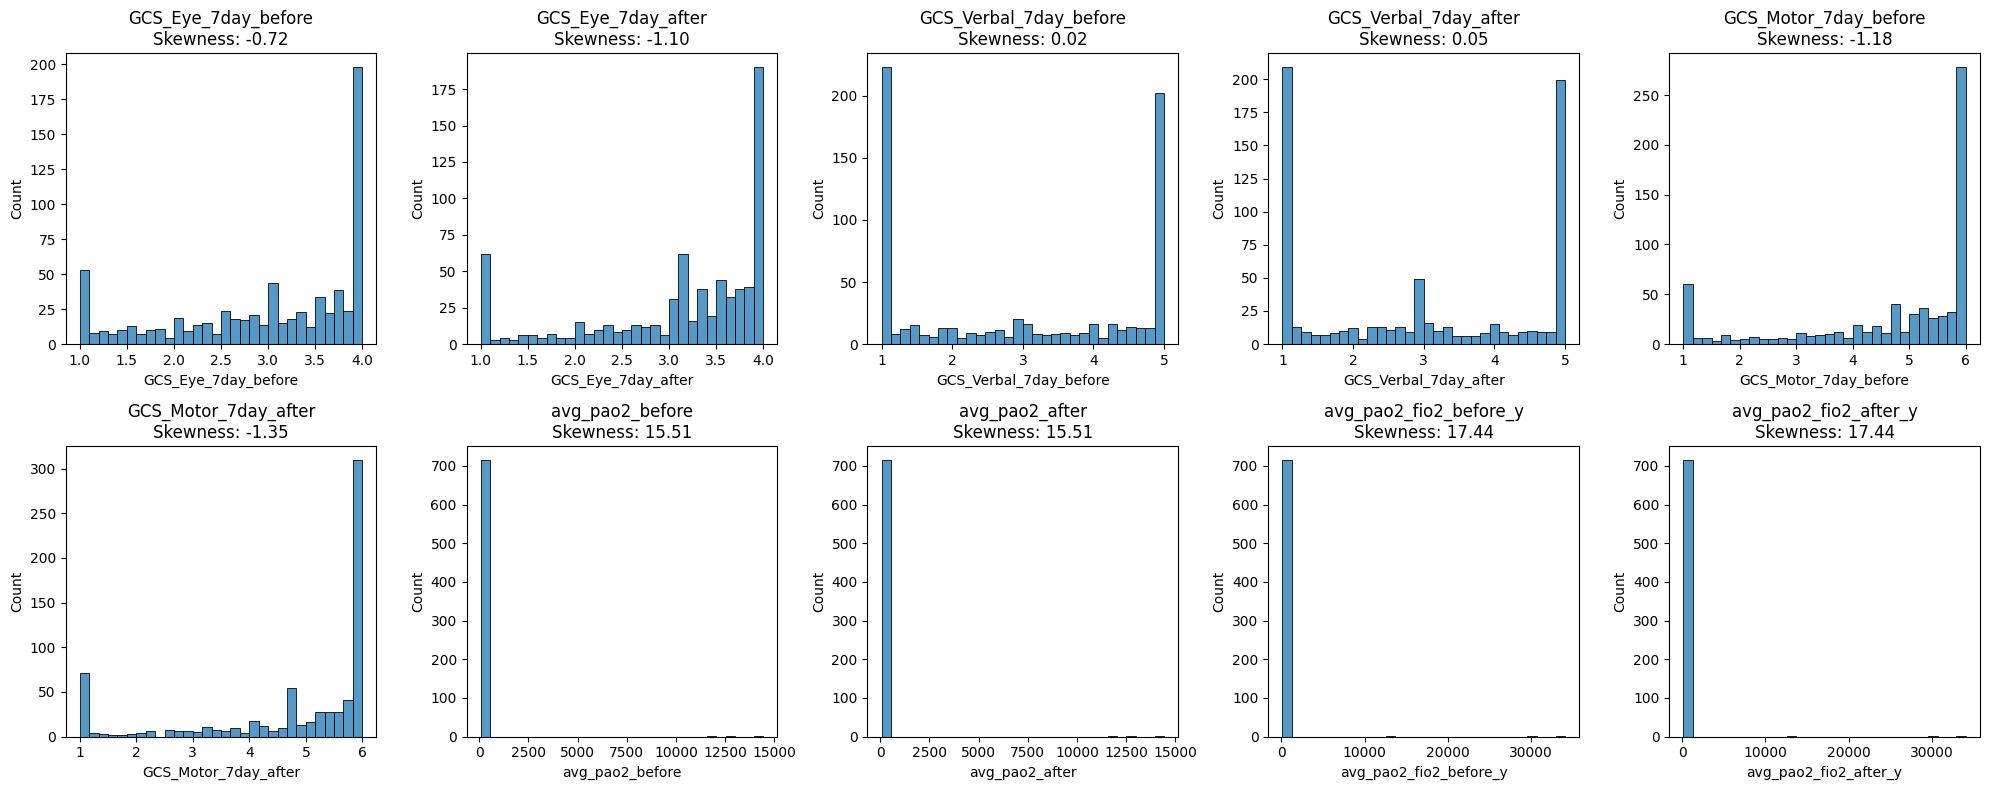

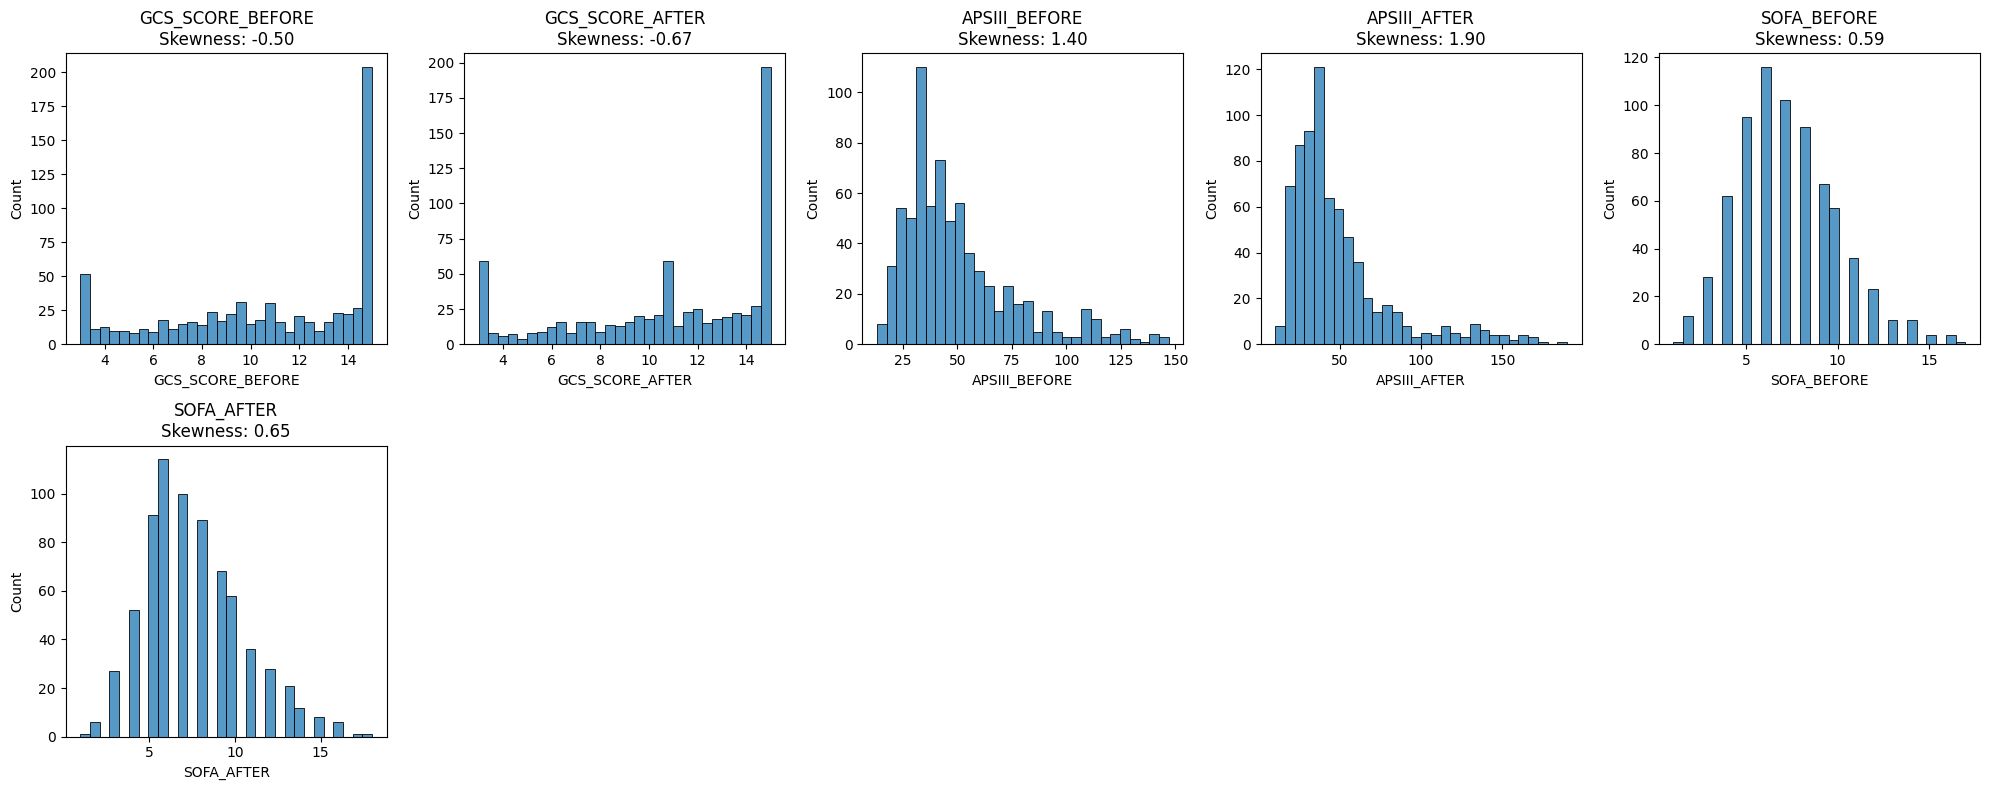

In [ ]:
# Calculating skewness for each feature
skewness_values = non_constant_columns.apply(skew).to_dict()

# Plotting in batches of 10 features at a time
batch_size = 10
total_features = non_constant_columns.shape[1]

for start in range(0, total_features, batch_size):
    end = min(start + batch_size, total_features)
    num_plots = end - start

    fig, axes = plt.subplots(2, 5, figsize=(20, 8)) # Dynamic grid size
    axes = axes.flatten()

    for i, column in enumerate(non_constant_columns.columns[start:end]):
        sns.histplot(non_constant_columns[column], bins=30, kde=False, ax=axes[i])
        axes[i].set_title(f'{column}\nSkewness: {skewness_values[column]:.2f}')

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
##apply log transform to features where skewness>3
# Apply log transform to features where skewness > 3 using .loc to avoid the warning
skewed_columns = [column for column, skewness in skewness_values.items() if skewness > 3]

# Use .loc to modify the original DataFrame safely
df.loc[:, skewed_columns] = df[skewed_columns].apply(np.log1p)

# Recalculate skewness after transformation (optional, for checking results)
skewness_values_after_transform = df.apply(skew).to_dict()
skewed_columns = [column for column, skewness in skewness_values_after_transform.items() if skewness > 3]
print(f"Skewed columns after transformation: {skewed_columns}")

Skewed columns after transformation: ['before7_anticoagulant_input', 'after7_num_anticoagulant_input', 'after_7_Prothrombin_time', 'INR_7day_after', 'avg_pao2_fio2_before_x', 'avg_pao2_fio2_after_x', 'avg_pao2_before', 'avg_pao2_after', 'avg_pao2_fio2_before_y', 'avg_pao2_fio2_after_y']


/usr/local/lib/python3.10/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [ ]:
df.head(5)

,SodiumBicarbonate_7day_after,WhiteBloodCells_7day_before,WhiteBloodCells_7day_after,ALT_7day_before,ALT_7day_after,Aspartate_Aminotransferase_7day_before,Aspartate_Aminotransferase_7day_after,Red_Cell_Distribution_Width_ALT_7day_before,Red_Cell_Distribution_Width_7day_after,avg_mch_before,avg_mch_after,avg_ph_before,avg_ph_after,avg_sodium_before,avg_sodium_after,avg_glucose_before,avg_glucose_after,prev_event_count,before7_num_antibiotics_input,after7_num_antibiotics_input,before7_num_vasoactive_input,after7_num_vasoactive_input,before7_anticoagulant_input,after7_num_anticoagulant_input,before7_max_temperature_c,after7_max_temperature_c,before7_avg_potassium,after7_avg_potassium,before7_avg_creatinine,after7_avg_creatinine,before7_Prothrombin_time,after_7_Prothrombin_time,INR_7day_before,INR_7day_after,Platelets_7day_before,Platelets_7day_after,AnionGap_7day_before,AnionGap_7day_after,avg_pao2_fio2_before_x,avg_pao2_fio2_after_x,mortality_status,SodiumBicarbonate_7day_before,MAP_7day_before,MAP_7day_after,Bilirubin_7day_before,Bilirubin_7day_after,UrineOutput_7day_before,UrineOutput_7day_after,gender,age,HeartRate_7day_before,HeartRate_7day_after,RespiratoryRate_7day_before,RespiratoryRate_7day_after,GCS_Eye_7day_before,GCS_Eye_7day_after,GCS_Verbal_7day_before,GCS_Verbal_7day_after,GCS_Motor_7day_before,GCS_Motor_7day_after,avg_pao2_before,avg_pao2_after,avg_pao2_fio2_before_y,avg_pao2_fio2_after_y,GCS_SCORE_BEFORE,GCS_SCORE_AFTER,APSIII_BEFORE,APSIII_AFTER,SOFA_BEFORE,SOFA_AFTER
0,26.333333,1.274363,1.222620,1.510844,1.478051,1.691462,1.624826,14.525000,14.580000,29.612500,29.380000,7.448462,7.533333,131.615385,130.166667,227.871347,1.858116,0.526589,12,5,12,0,0.0,0.0,39.333333,37.277778,4.461538,3.966667,3.061538,0.848012,12.733333,1.282706,1.166667,0.581353,208.000000,142.600000,20.307692,19.500000,1.845727,1.845727,1,18.769231,103.850241,87.375000,0.224195,0.363431,840,840,1,66,103.850241,87.375000,19.436548,1.405801,2.305556,3.928571,1.0,1.000000,3.472222,4.545455,1.741368,1.741368,1.845727,1.845727,6.777778,9.474026,58,47,8,9
1,20.500000,0.877496,0.091038,1.563192,1.570003,1.759567,1.679542,16.970000,18.833333,33.205000,31.366667,7.352593,7.420000,131.576923,133.625000,135.480738,1.751882,0.000000,35,9,26,0,0.0,0.0,39.277778,38.222222,4.734615,4.650000,3.148000,0.776345,15.516667,1.320171,1.425000,0.617569,23.739130,25.333333,20.846154,20.125000,1.884823,1.884823,1,21.076923,105.246324,109.366667,0.514924,0.812157,840,840,1,63,105.246324,109.366667,18.070111,1.321028,2.674419,2.909091,1.0,1.000000,4.488372,5.000000,1.728771,1.728771,1.884823,1.884823,8.162791,8.909091,43,52,11,13
2,10.000000,1.280306,1.298521,1.394925,1.391640,1.531269,1.827911,14.433333,16.221626,31.566667,29.977662,7.305000,7.090000,125.818182,136.000000,91.000000,1.820499,0.000000,2,0,9,3,0.0,0.0,36.888889,36.968333,4.600000,4.700000,1.100000,0.526589,18.000000,1.355661,1.600000,0.656591,244.000000,201.894403,29.000000,29.000000,1.856397,1.856397,1,18.545455,86.875000,74.333333,0.769592,0.874865,840,840,0,64,86.875000,74.333333,26.125000,1.353688,4.000000,3.127858,5.0,2.957066,6.000000,4.800685,1.759333,1.759333,1.856397,1.856397,15.000000,10.885610,40,58,5,7
3,28.944444,1.352186,1.337736,1.907910,1.761349,1.947693,1.758551,14.221429,15.066667,30.028571,29.291667,7.382727,7.440000,142.950000,145.950000,198.375000,1.767649,0.000000,4,19,42,1,0.0,0.0,37.111111,38.777778,3.876190,3.530000,0.806250,0.577092,13.275000,1.303500,1.133333,0.574943,134.647059,187.250000,11.625000,12.833333,1.857579,1.857579,0,23.187500,79.160305,78.269006,0.769592,0.549489,840,840,1,64,79.160305,78.269006,18.213740,1.355714,1.709677,2.513514,1.0,1.702703,3.400000,4.027027,1.747592,1.747592,1.857579,1.857579,6.109677,8.243243,46,35,9,6
4,30.625000,1.067632,1.042396,1.652966,1.448822,1.402018,1.378870,17.171429,16.500000,30.785714,30.914286,7.422468,7.435819,133.066667,132.875000,161.427392,1.802830,0.526589,0,0,14,4,0.0,0.0,37.111111,36.611111,4.061538,3.900000,1.461538,0.56

In [ ]:
df.to_csv('/content/drive/MyDrive/Health A3/final_data_log.csv',index=False)